In [1]:
%load_ext watermark
%watermark  -d -u -a 'Shihao Yang, Yifan Zhang, Kexiao Zhu' -v -p numpy,scipy,matplotlib,sklearn

Author: Shihao Yang, Yifan Zhang, Kexiao Zhu

Last updated: 2021-12-06

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

numpy     : 1.20.1
scipy     : 1.6.2
matplotlib: 3.3.4
sklearn   : 0.24.1



In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("winequalityN.csv")
print(df.head())
print(df.info())
print(df.describe())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

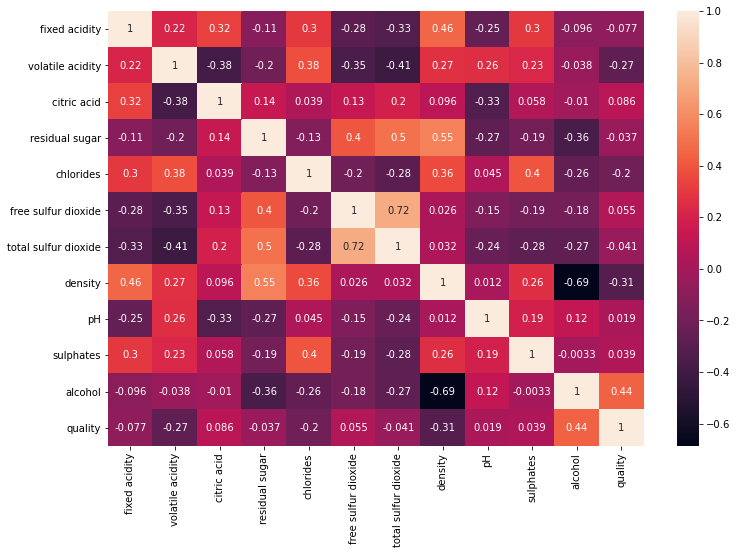

In [4]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [5]:
label_list = []
labels_map = {
    "white": 0,
    "red": 1}
for i in range(len(df)):
    label_list.append(labels_map[df["type"][i]])
df["type"] = label_list

labels_map = {
    9: 'high',
    8: 'high',
    7: 'medium',
    6: 'medium',
    5: 'medium',
    4: 'low',
    3: 'low'
}

In [6]:
df['quality'] = df['quality'].map(labels_map)

labels_map = {
    "low": 0,
    "medium": 1,
    "high": 2
}

label_list2 = []
for i in range(len(df)):
    label_list2.append(labels_map[df["quality"][i]])
df["label"] = label_list2

df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,medium,1
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,medium,1
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,medium,1
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,medium,1
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,medium,1


In [7]:
df = df.drop(columns=['quality'])
df = df.fillna(df.mean())

X = df[['fixed acidity',"volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]].values
y = df['label'].values

In [8]:
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)
print('X_test.shape:', X_test.shape)
print('y_test.shape:', y_test.shape)

X_train.shape: (4547, 11)
y_train.shape: (4547,)
X_test.shape: (1950, 11)
y_test.shape: (1950,)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13]}

gs = GridSearchCV(estimator=knn,
                  param_grid=param_grid,
                  refit=True,
                  cv=10,
                  n_jobs=-1)

gs.fit(X_train, y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params:', gs.best_params_)

Best Accuracy: 93.14%
Best Params: {'n_neighbors': 9}


In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
knn=knn.score(X_test,y_test)
knn

0.9312820512820513

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

from mlxtend.evaluate import confusion_matrix
#or
#from sklearn.metrics import confusion_matrix



pipe_knn = make_pipeline(StandardScaler(),
                         KNeighborsClassifier(n_neighbors=5))

pipe_knn.fit(X_train, y_train)

y_pred = pipe_knn.predict(X_test)

confmat = confusion_matrix(y_test, y_pred)

print(confmat)

[[   4   70    0]
 [   8 1802    7]
 [   0   51    8]]


In [11]:
y_target =   y_test
y_predicted = y_pred

cm1 = confusion_matrix(y_target=y_target, 
                       y_predicted=y_predicted)
print(cm1)

[[   4   70    0]
 [   8 1802    7]
 [   0   51    8]]


In [12]:
cm2 = confusion_matrix(y_target=y_target, 
                       y_predicted=y_predicted,
                       positive_label=1,
                       binary=True)
print(cm2)

[[  12  121]
 [  15 1802]]


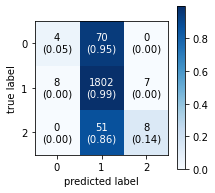

In [13]:
fig, ax = plot_confusion_matrix(conf_mat=confmat,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                figsize=(3, 3))
plt.show()